## Look at the big picture
Aims: Predict insurance claims


Performance measure: RMSE MAE

## Get the data

### Import the packages and the data

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/InsuranceDataset.csv')
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment1"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Take a Quick Look at the Data Structure

In [2]:
# get a glance of the data
df.head()

,age,sex,home,bmi,children,smoker,drinking,past claims
0,49.0,female,Kowloon,32.3,2.0,no,no,"72,433"
1,55.0,female,South NT,29.5,2.0,no,occasional,"79,358"
2,53.0,female,North NT,26.0,0.0,no,frequent,"67,628"
3,19.0,male,Hong Kong Island,33.2,0.0,no,occasional,"7,020"
4,59.0,male,Hong Kong Island,36.5,1.0,no,frequent,"82,368"


In [3]:
# get the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   float64
 1   sex          1338 non-null   object 
 2   home         1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   children     1335 non-null   float64
 5   smoker       1338 non-null   object 
 6   drinking     1338 non-null   object 
 7   past claims  1338 non-null   object 
dtypes: float64(3), object(5)
memory usage: 83.9+ KB


We find the "past claims" is object type and it contains numbers. So it should be converted into numerical attribute. But there is another question, the thousand separator separates the number. We have to remove all thousand separators first so that we can covert "past claims" to float type directly.

In [4]:
# convert 'past claims'  to float type
df = df.replace(',', '', regex=True)
df['past claims'] = df['past claims'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   float64
 1   sex          1338 non-null   object 
 2   home         1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   children     1335 non-null   float64
 5   smoker       1338 non-null   object 
 6   drinking     1338 non-null   object 
 7   past claims  1338 non-null   float64
dtypes: float64(4), object(4)
memory usage: 83.9+ KB


In [5]:
df.describe()

,age,bmi,children,past claims
count,1338.000000,1338.000000,1335.000000,1338.000000
mean,39.281764,29.738341,1.093633,90388.195815
std,14.207480,6.109329,1.205092,84782.257933
min,18.000000,14.800000,0.000000,3374.000000
25%,27.000000,25.400000,0.000000,30353.750000
50%,39.000000,29.500000,1.000000,63390.000000
75%,51.000000,33.600000,2.000000,113611.000000
max,119.000000,52.100000,5.000000,442160.000000


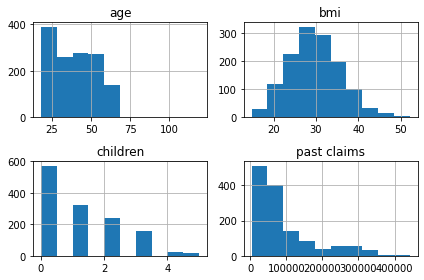

In [6]:
df.hist()
save_fig("Hist")  # extra code

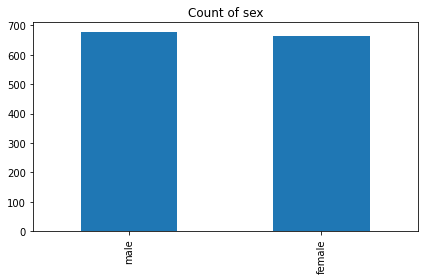

In [7]:
df["sex"].value_counts().plot(kind='bar')
plt.title('Count of sex')
save_fig("Count of sex")  # extra code

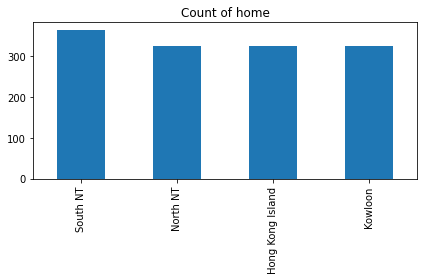

In [8]:
df["home"].value_counts().plot(kind='bar')
plt.title('Count of home')
save_fig("Count of home")  # extra code

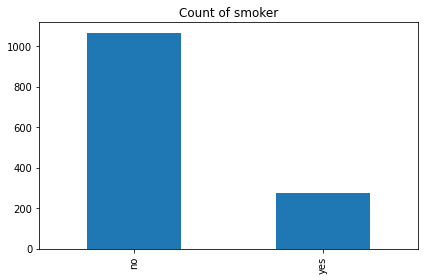

In [9]:
df["smoker"].value_counts().plot(kind='bar')
plt.title('Count of smoker')
save_fig("Count of smoker")  # extra code

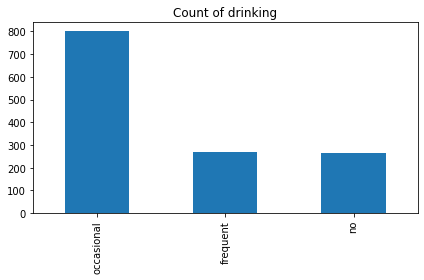

In [10]:
df["drinking"].value_counts().plot(kind='bar')
plt.title('Count of drinking')
save_fig("Count of drinking")  # extra code

### Create Test set

In [11]:
# Random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


## Discover and visualize the data to gain insights

In [12]:
train_copy = train_set.copy()
train_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 810 to 1126
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1069 non-null   float64
 1   sex          1069 non-null   object 
 2   home         1069 non-null   object 
 3   bmi          1069 non-null   float64
 4   children     1067 non-null   float64
 5   smoker       1069 non-null   object 
 6   drinking     1069 non-null   object 
 7   past claims  1069 non-null   float64
dtypes: float64(4), object(4)
memory usage: 75.4+ KB


### Visualizing data

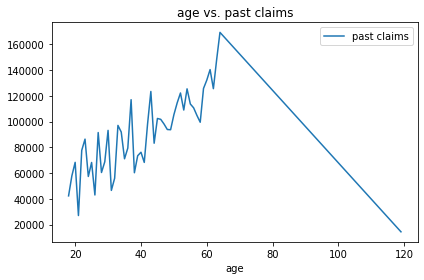

In [13]:
from matplotlib import pyplot as plt
train_copy.groupby('age').mean().reset_index().plot(
    x='age', y='past claims', title='age vs. past claims')
save_fig("age vs. past claims")  # extra code

We find that it is an outlier here, so we have to remove it.

In [14]:
train_copy = train_copy[train_copy.age != 119]
train_copy.describe()

,age,bmi,children,past claims
count,1068.000000,1068.000000,1066.000000,1068.000000
mean,39.124532,29.721067,1.107880,88522.371723
std,14.116746,6.044818,1.216704,82897.397038
min,18.000000,14.800000,0.000000,3374.000000
25%,26.000000,25.400000,0.000000,30133.250000
50%,39.000000,29.500000,1.000000,63304.500000
75%,51.000000,33.600000,2.000000,110939.500000
max,64.000000,52.100000,5.000000,442160.000000


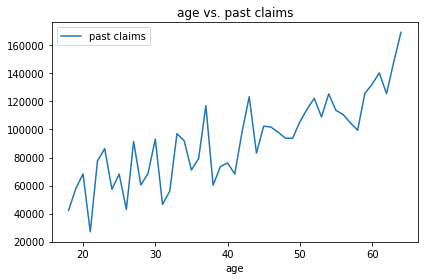

In [15]:
#from matplotlib import pyplot as plt
train_copy.groupby('age').mean().reset_index().plot(
    x='age', y='past claims', title='age vs. past claims')
save_fig("age vs. past claims--2")  # extra code

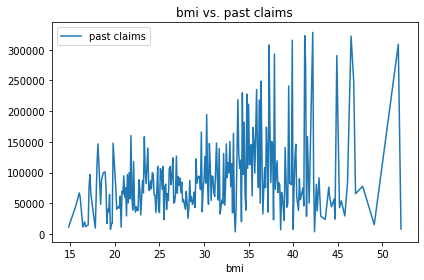

In [16]:
train_copy.groupby('bmi').mean().reset_index().plot(
    x='bmi', y='past claims', title='bmi vs. past claims')
save_fig("bmi vs. past claims")  # extra code

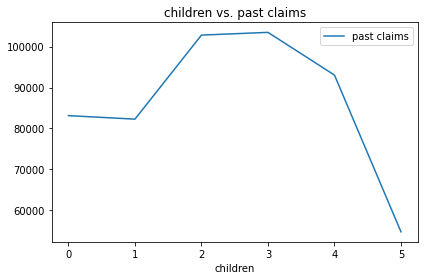

In [17]:
train_copy.groupby('children').mean().reset_index().plot(
    x='children', y='past claims', title='children vs. past claims')
save_fig("children vs. past claims")  # extra code

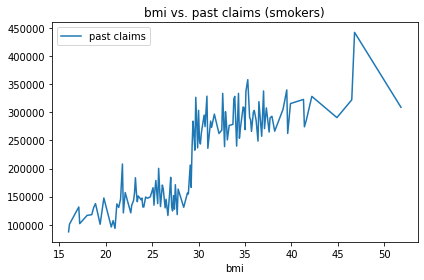

In [18]:
train_copy.loc[train_copy['smoker'] == 'yes'].groupby('bmi').mean().reset_index(
).plot(x='bmi', y='past claims', title='bmi vs. past claims (smokers)')
save_fig("bmi vs. past claims(smokers)")  # extra code

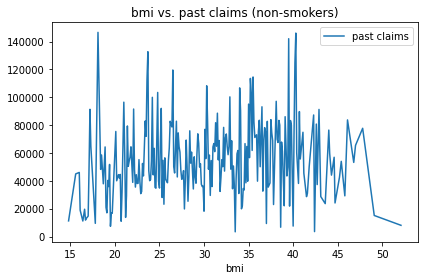

In [19]:
train_copy.loc[train_copy['smoker'] == 'no'].groupby('bmi').mean().reset_index(
).plot(x='bmi', y='past claims', title='bmi vs. past claims (non-smokers)')
save_fig("bmi vs. past claims (non-smokers)")  # extra code

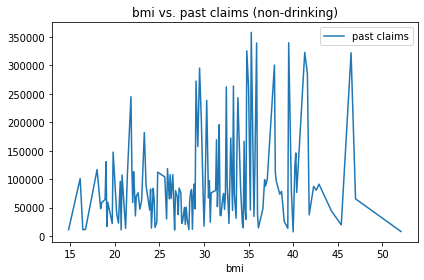

In [20]:
train_copy.loc[train_copy['drinking'] == 'no'].groupby('bmi').mean().reset_index(
).plot(x='bmi', y='past claims', title='bmi vs. past claims (non-drinking)')
save_fig("bmi vs. past claims (non-drinking)")  # extra code

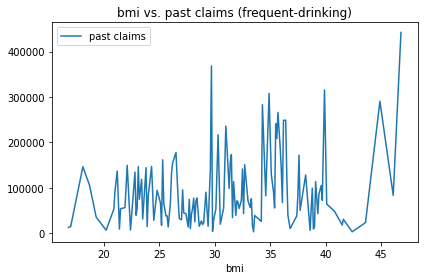

In [21]:
train_copy.loc[train_copy['drinking'] == 'frequent'].groupby('bmi').mean().reset_index(
).plot(x='bmi', y='past claims', title='bmi vs. past claims (frequent-drinking)')
save_fig("bmi vs. past claims (frequent-drinking)")  # extra code

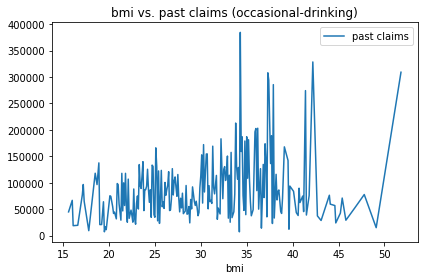

In [22]:
train_copy.loc[train_copy['drinking'] == 'occasional'].groupby('bmi').mean().reset_index(
).plot(x='bmi', y='past claims', title='bmi vs. past claims (occasional-drinking)')
save_fig("bmi vs. past claims (occasional-drinking)")  # extra code

### Look for correlations

In [23]:
corr_matrix = train_copy.corr()
corr_matrix


,age,bmi,children,past claims
age,1.000000,0.096352,0.040008,0.312099
bmi,0.096352,1.000000,0.001556,0.177852
children,0.040008,0.001556,1.000000,0.066519
past claims,0.312099,0.177852,0.066519,1.000000


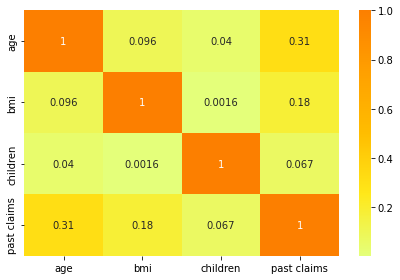

In [24]:
sns.heatmap(corr_matrix, cmap='Wistia', annot=True)
save_fig("corr_matrix")  # extra code

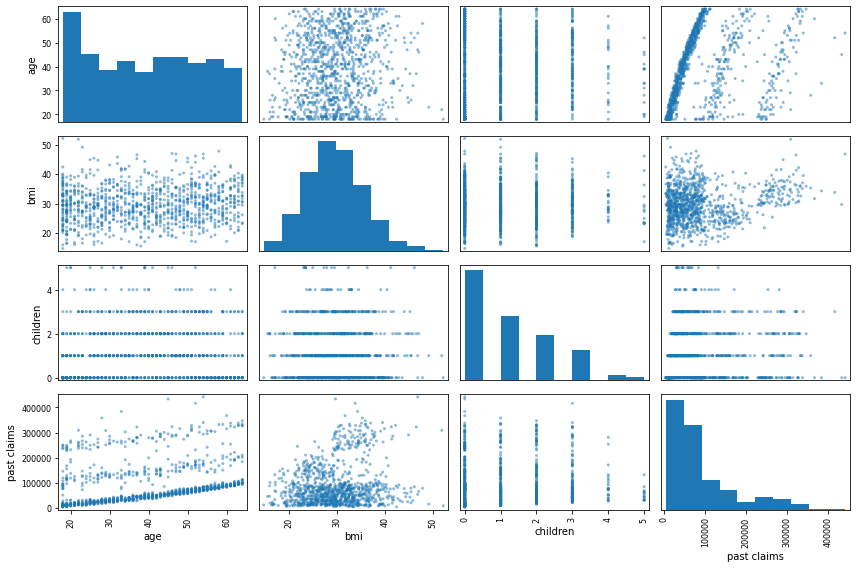

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["age", "bmi", "children",
              "past claims"]
scatter_matrix(train_copy[attributes], figsize=(12, 8))
save_fig("attributes")  # extra code
plt.show()


## Prepare the data for ML algotithms


In [26]:
train_set.dropna(inplace=True)
insurance = train_set[['age', 'bmi', 'smoker']]
insurance_labels = train_set["past claims"].copy()


In [27]:
insurance

,age,bmi,smoker
810,18.0,24.0,yes
1288,25.0,25.5,no
591,34.0,30.2,yes
973,18.0,24.9,no
889,26.0,28.8,no
...,...,...,...
1095,29.0,32.2,no
1130,40.0,35.5,no
1294,18.0,23.0,no
860,33.0,35.2,no


### Clean the data


There are some missing features which will disturb the data, I need to fix these problems by using different methods.

### Handling Text and Categorical Attributes

### Feature scaling and Transformation

### Custom Transormers

### Transformation Pipilines

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))


preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)



## Train a Model

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(insurance, insurance_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x122800d60>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x122800eb0>)])),
                ('linearregression', LinearRegression())])

In [30]:
insurance

,age,bmi,smoker
810,18.0,24.0,yes
1288,25.0,25.5,no
591,34.0,30.2,yes
973,18.0,24.9,no
889,26.0,28.8,no
...,...,...,...
1095,29.0,32.2,no
1130,40.0,35.5,no
1294,18.0,23.0,no
860,33.0,35.2,no


In [31]:
insurance_predictions = lin_reg.predict(insurance)
insurance_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred


array([169800.,  21200., 212500.,   7400.,  30600.])

In [32]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(insurance_labels, insurance_predictions,
                              squared=False)
lin_rmse


42552.44290399677

In [33]:
y_test = test_set["past claims"].copy()
y=np.array(y_test).reshape(1,-1)
print(y)

[[ 42543.  69822.  49570.  93508.  61939.  58042.  56616. 221707.  54253.
   95821.  34618. 135645.  34294. 261760.  33741.  63658.  85897.  99000.
  181368.  52049.  53375.  69425. 257499. 100699.  40872.  19317. 308671.
  165090. 142389.  57832.  73093.  11292.  52258.  75822. 318802.  26452.
   65224. 337228.   7409.  97929.  64895. 276815.  18797.  22413. 322237.
  248299. 109399.  72120. 174078.  15363. 123548.  46022.  66443. 122997.
    6498.  54230. 129410.  78581.  18511. 155202.  77928.  12508.  80843.
  276247. 142256. 226645. 110215. 191080.  92478.  24784.  54160. 200866.
   74102.  36376.  12551. 179586.  31901. 163979.  61895.  30052. 271052.
   27298.  37509.  58078.   7784.  41637.  73798. 244183.  17947.  41891.
   11676.   5059.  55214.  85328. 106147.  10643.  52090. 267013.  73937.
   66844.  93490.  39988.  20617.  92122.  58852.  43337. 272278.  82905.
   47802. 131211.  13581. 338873.  79888.  15965.  67583. 227264.  32906.
   22890.   6798.  48854.  86161.   78

In [34]:
X_test = test_set[['age', 'bmi', 'smoker']]
y_test = test_set["past claims"].copy()

final_predictions = lin_reg.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse


44033.37354552146

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 802 to 764
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     269 non-null    float64
 1   bmi     269 non-null    float64
 2   smoker  269 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.4+ KB


In [36]:
##Predicting the charges
#y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
sdf = pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions})
sdf


,Actual,Predicted
802,42543.0,51233.336006
548,69822.0,71525.251571
570,49570.0,59024.668865
430,93508.0,113469.518943
259,61939.0,76380.828496
...,...,...
808,121204.0,181056.352453
680,51855.0,48796.763066
365,93889.0,90077.951410
842,64462.0,86143.829487


/Library/Python/3.8/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


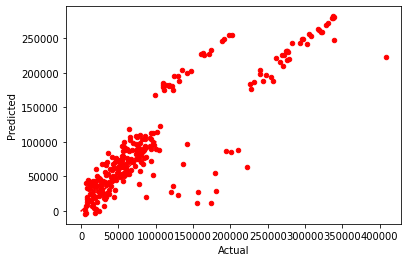

In [37]:
ax=sdf.plot(kind='scatter', x='Actual', y='Predicted', color='red')
x = [0, 100000]
y = [0, 100000]

# Plot the line
plt.plot(x, y, color='red')

#df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", )